### Titanic Dataset
Exploratory data analysis is one of the most important step for any data science project Here we will do the data analysis of titanic dataset. We will use the Pandas,Seaborn and Matplotlib library for the analysis. It has 12 columns.We have 11 features using which we shall predict the target variable which is ‘Survived’. First we will import the needful libraries and then load the data



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.drop(["PassengerId",'Ticket'],axis = 1,inplace = True)

From common sense, columns such as PassengerId, Name and Ticket number shouldn't be related to the survival probability. So these columns can be droped. It is also seen that there are missing values in Age and Cabin columns which needs to be handeled properly.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


It indicates that there are total of 891 passesnger details among which 177 people's Age is missing and 687 people's Cabin details are missing. And 2 people's Embarkation details are missing.

In [60]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Missing values in Age ,Cabin and Embarked

In [6]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In the train data, there’re 891 passengers, and the average survival rate is 38%. Age ranges from 0.42 to 80 and the average is ~30 year old. At least 50% of passengers don’t have siblings / spouses aboard the Titanic, and at least 75% of passengers don’t have parents / children aboard the Titanic. The fare varies a lot.

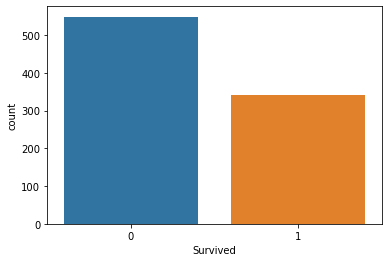

In [7]:
sns.countplot(x='Survived', data=train);

In [8]:
train.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

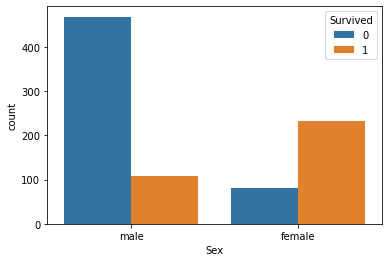

In [10]:
sns.countplot("Sex",hue='Survived',data=train)

Female Survival rate was more than Male.Male died more in comparison to female as shown in movie

In [12]:
pd.crosstab(train.Pclass, train.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

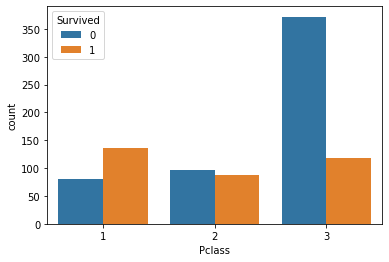

In [14]:
sns.countplot("Pclass",hue="Survived",data=train)

In the visualization,  it is clearly seen that pasangers of Class 1 are given high priority while Rescue in comparison to third and second class.

In [15]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

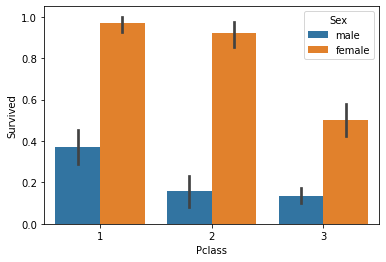

In [16]:
sns.barplot('Pclass','Survived',hue='Sex', data=train)

In [56]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

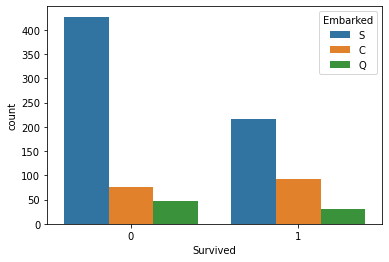

In [17]:
sns.countplot(x='Survived', data=train,hue = 'Embarked')

Majority of the passengers boarded from S. So, the missing values can be filled with S.

In [18]:
pd.crosstab([train.Sex, train.Survived], [train.SibSp, train.Pclass], margins=True)

SibSp              0             1          2         3          4  5  8  All
Pclass             1    2    3   1   2   3  1  2   3  1  2   3   3  3  3     
Sex    Survived                                                              
female 0           1    3   33   2   3  21  0  0   3  0  0   7   4  1  3   81
       1          48   41   48  38  25  17  3  3   4  2  1   1   2  0  0  233
male   0          59   67  235  16  20  35  1  4   7  1  0   4  11  4  4  468
       1          29    9   35  15   7  10  1  1   1  0  0   0   1  0  0  109
All              137  120  351  71  55  83  5  8  15  3  1  12  18  5  7  891

The above crosstab indicates 2 things:

1.Most of the passerenges didnt had siblings onboard and the majority had atmost 1 sibling onboard

2.Not much of priority was given to the passengers who had sibelings onboard in the rescue operation

In [20]:
pd.crosstab([train.Sex, train.Survived], [train.Parch, train.Pclass], margins=True)

Parch              0             1           2          3     4     5  6  All
Pclass             1    2    3   1   2   3   1   2   3  2  3  1  3  3  3     
Sex    Survived                                                              
female 0           1    5   35   0   1  13   2   0  17  0  1  0  2  3  1   81
       1          63   40   50  17  17  12  11  11   8  2  1  0  0  1  0  233
male   0          63   81  260  10   7  22   3   3  15  0  1  1  1  1  0  468
       1          36    8   36   4   7   8   5   2   3  0  0  0  0  0  0  109
All              163  134  381  31  32  55  21  16  43  2  3  1  3  5  1  891

The above crosstab indicates 2 things:

1.Most of the passerenges didnt had parents onboard and the majority had atmost 1 parent onboard
2.Not much of priority was given to the passengers who had parents onboard in the rescue operation

In [54]:
train["SibSp"].value_counts(normalize=True)*100

0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64

<AxesSubplot:title={'center':'Number of Siblings or Spouse accompained'}>

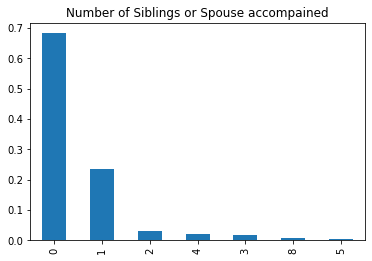

In [55]:
train["SibSp"].value_counts(normalize=True).plot.bar(title="Number of Siblings or Spouse accompained")

68% of people were travelling alone without siblings and spouse.

In [21]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


The above correlation table indicated below features:

1.The Age was not a priority in the rescue operation similat to the sibelings and parents column as correlation with the target variable is very low
2.There should have been a higher correlation between the Fare and Pclass

In [22]:
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,C


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

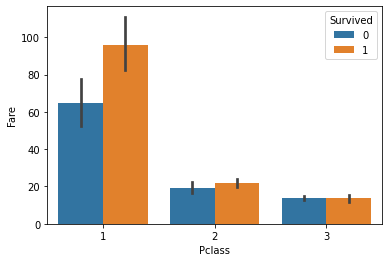

In [24]:
sns.barplot(y = "Fare",x = "Pclass",data = train,hue="Survived")

In [ ]:
The richer people who paid highest fare were given priority

<AxesSubplot:xlabel='Sex', ylabel='Age'>

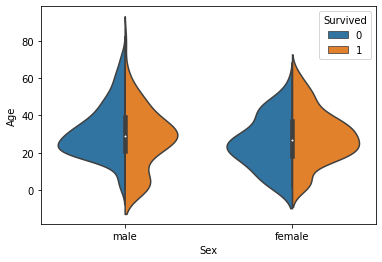

In [58]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",data=train,split=True)


This graph gives a summary of the age range of men, women and children who were saved. The survival rate is –  

Good for children.
High for women in the age range 20-50.
Less for men as the age increases.

<AxesSubplot:xlabel='Age'>

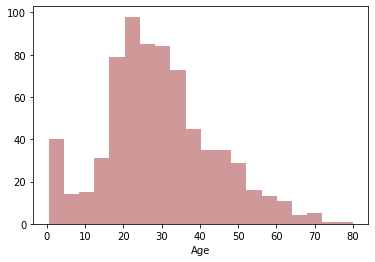

In [50]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred')

Most of the people were between the age group of 20-40 

In [33]:
print('Oldest person Survived was of:',train['Age'].max())
print('Youngest person Survived was of:',train['Age'].min())
print('Average person Survived was of:',train['Age'].mean())

Oldest person Survived was of: 80.0
Youngest person Survived was of: 0.42
Average person Survived was of: 29.69911764705882


In [41]:
#how many persons do we have age below 40 and they Survived.
train[(train["Age"]<40) & (train["Survived"]==1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...
874,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,24.0000,NaN,C
875,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,7.2250,NaN,C
880,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,26.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S


In [42]:
len(train[(train["Age"]<40) & (train["Survived"]==1)])

229

In [43]:
#how many persons died whose age was less than 40.
train[(train["Age"]<40) & (train["Survived"]==0)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.250,NaN,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.050,NaN,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.075,NaN,S
12,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,8.050,NaN,S
13,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,31.275,NaN,S
...,...,...,...,...,...,...,...,...,...,...
883,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,10.500,NaN,S
884,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,7.050,NaN,S
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.125,NaN,Q
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.000,NaN,S


In [44]:
len(train[(train["Age"]<40) & (train["Survived"]==0)])

322